In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('Übungen/series.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

#print(dataset)
plt.boxplot(dataset)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit a feed-forward MLP Network
#model = Sequential()
#model.add(Dense(6, input_dim=look_back, activation='relu'))
#model.add(Dense(50))
#model.add(Dense(10))
#model.add(Dense(1))


# # create and fit the LSTM network

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
#model.add(Dropout(0.2)) 
model.add(LSTM(units=50, return_sequences=True))  
#model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
#model.add(Dropout(0.2))
model.add(LSTM(units=50))  
#model.add(Dropout(0.2))  
model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=2, verbose=2)

480 237
Epoch 1/5
478/478 - 7s - loss: 0.0913
Epoch 2/5
478/478 - 2s - loss: 0.0473
Epoch 3/5


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

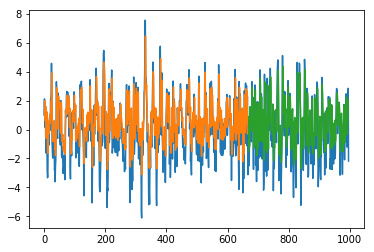

In [42]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9180e754a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9180e75b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9180e750b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9180e75f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9180e80550>],
 'means': []}

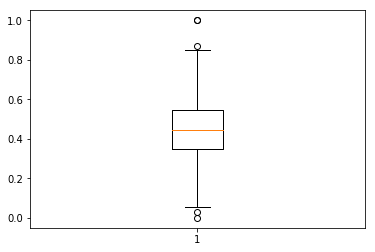

In [43]:
plt.boxplot(dataset)